## Installing dependencies

In [80]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 0.4/99.8 MB 5.4 MB/s eta 0:00:19
   ---------------------------------------- 0.9/99.8 MB 7.0 MB/s eta 0:00:15
    --------------------------------------- 1.4/99.8 MB 8.0 MB/s eta 0:00:13
    --------------------------------------- 1.8/99.8 MB 8.1 MB/s eta 0:00:13
    --------------------------------------- 2.2/99.8 MB 8.2 MB/s eta 0:00:12
   - -------------------------------------- 2.7/99.8 MB 8.1 MB/s eta 0:00:13
   - -------------------------------------- 3.1/99.8 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 3.6/99.8 MB 8.9 MB/s eta 0:00:11
   - -------------------------------------- 4.1/99.8 MB 9.0 MB/s eta 0:00:11
   - -------------------------------------- 4.6/99.8 MB 9.2 MB/s eta 0:00:11
   -- ------------------------------------- 5.1/99.8 MB 9.3 MB/s eta 0:00:11
   -- 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Prisha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [3]:
pip install nltk


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Prisha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [12]:
pip install WordCloud


   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 300.6/300.6 kB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Prisha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prisha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prisha\AppData\Roaming\nltk_data...


True

## Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import re 

In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [4]:
import nltk
import seaborn as sns

In [5]:
stop_words = set(stopwords.words('english'))

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [95]:
import pickle

In [7]:
from wordcloud import WordCloud

### Reading dataset and analysis

In [8]:
dataset = pd.read_csv('labeled_data.csv')

In [9]:
dataset.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
# 0 - hate speech 
# 1 - offensive speech 
# 2 -neither
dataset['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [11]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [12]:
dataset.tweet = dataset['tweet'].apply(data_processing)

In [13]:
# Dropping duplicate tweets
dataset = dataset.drop_duplicates('tweet')

In [14]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [15]:
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizing(x))


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24698 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24698 non-null  int64 
 1   count               24698 non-null  int64 
 2   hate_speech         24698 non-null  int64 
 3   offensive_language  24698 non-null  int64 
 4   neither             24698 non-null  int64 
 5   class               24698 non-null  int64 
 6   tweet               24698 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [17]:
dataset['class'].value_counts()

class
1    19111
2     4160
0     1427
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

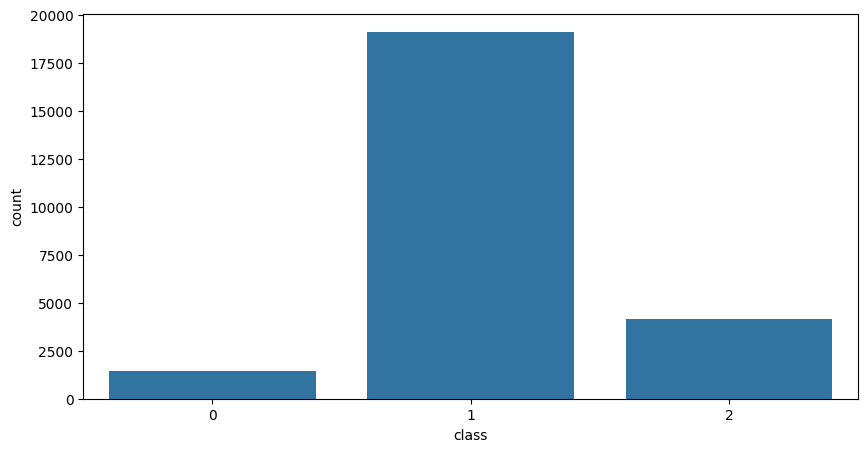

In [18]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='class', data = dataset)

In [19]:
vect=TfidfVectorizer(ngram_range=(1,3)).fit(dataset['tweet'])

In [20]:
X = dataset['tweet']

In [21]:
y = dataset['class']

In [22]:
X = vect.transform(X)

In [23]:
print(len(y))

24698


In [24]:
X

<24698x355237 sparse matrix of type '<class 'numpy.float64'>'
	with 589392 stored elements in Compressed Sparse Row format>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
X_train.size

472139

In [27]:
y_train.size

19758

In [28]:
X_test.size

117253

In [29]:
y_test.size

4940

In [30]:
print(X)

  (0, 343260)	0.19944908220400184
  (0, 343259)	0.19168910083495147
  (0, 343145)	0.1255606266266549
  (0, 320914)	0.07894968222648109
  (0, 304781)	0.1668228138268833
  (0, 304395)	0.10433446483948981
  (0, 285049)	0.19944908220400184
  (0, 285048)	0.19944908220400184
  (0, 285039)	0.14699360059562303
  (0, 267309)	0.19944908220400184
  (0, 267308)	0.19944908220400184
  (0, 259362)	0.04293320084931252
  (0, 203168)	0.19944908220400184
  (0, 203167)	0.19944908220400184
  (0, 203166)	0.19944908220400184
  (0, 200373)	0.19944908220400184
  (0, 200372)	0.19944908220400184
  (0, 200342)	0.09370037286798405
  (0, 152871)	0.19944908220400184
  (0, 152869)	0.18618330643293335
  (0, 152858)	0.12046204905348591
  (0, 75063)	0.19944908220400184
  (0, 75062)	0.19944908220400184
  (0, 75044)	0.14894156552711152
  (0, 71812)	0.19944908220400184
  :	:
  (24697, 231174)	0.1373317781511455
  (24697, 226089)	0.1702481254267012
  (24697, 226088)	0.1702481254267012
  (24697, 226087)	0.1702481254267012
  

## Model 1 - Logistic regression

In [31]:
logreg = LogisticRegression(max_iter = 300)
logreg.fit(X_train, y_train) 

LogisticRegression(max_iter=300)

In [32]:
logreg_predict = logreg.predict(X_test) #predicting the value for test data


In [33]:
logreg_acc = accuracy_score(logreg_predict,y_test)

In [34]:
print("Test accuracy: {:.2f}%".format(logreg_acc*100)) 

Test accuracy: 84.62%


In [35]:
print(classification_report(y_test, logreg_predict))

              precision    recall  f1-score   support

           0       0.58      0.04      0.07       283
           1       0.84      0.99      0.91      3794
           2       0.90      0.49      0.63       863

    accuracy                           0.85      4940
   macro avg       0.77      0.50      0.54      4940
weighted avg       0.84      0.85      0.81      4940



## Model 2 - Support Vector Machine

In [36]:
from sklearn import svm

In [37]:
clf = svm.SVC()

In [38]:
clf.fit(X_train, y_train)

SVC()

In [39]:
results = clf.predict(X_test)

In [40]:
svm_acc = accuracy_score(results,y_test)
svm_acc

0.844331983805668

## Model 3 - K nearest neighbours

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
neigh = KNeighborsClassifier(n_neighbors=7)

In [51]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [52]:
neight_result = neigh.predict(X_test)

In [53]:
neigh_acc = accuracy_score(neight_result,y_test)
neigh_acc

0.8257085020242915

## Model 4 - SGD Classifier

In [81]:
from xgboost import XGBClassifier

In [82]:
xg = XGBClassifier(random_state=0)


In [83]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
xg_pred = xg.predict(X_test)

In [85]:
xg_accuracy = accuracy_score(xg_pred, y_test)
xg_accuracy

0.9010121457489878

## Model 5 - Random Forest classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfg = RandomForestClassifier(max_depth = 4, random_state = 0)

In [92]:
rfg.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [93]:
rfg_pred = rfg.predict(X_test)

In [94]:
rfg_score = accuracy_score(rfg_pred, y_test)
rfg_score

0.7680161943319838

## Testing on random data

In [76]:
tweet_test = "i need to survive this semester to actually make a difference. what do yall think hceijfeiof efeifjeiofjef efheifhiefhef efehfiehfe fefiehfiehf efiehfeihfief ebfiefiefhef"
tweet_preproce = data_processing(tweet_test)
tweet_vector = vect.transform([tweet_test])


In [77]:
prediction = logreg.predict(tweet_vector)


In [78]:
prediction[0]

1

## Exporting the model

In [96]:
pickle.dump(xg, open('model.pkl', 'wb'))

In [97]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [100]:
ans = pickled_model.predict(X_test)
accuracy = accuracy_score(ans, y_test)
accuracy

0.9010121457489878